# <center>Monte Carlo Methods For Option Pricing</center>

**What are Options ?**  
An option is a financial derivative that represents a contract between two parties. The contract gives the buyer the right, but not the obligation, to buy or sell an underlying asset at a specified price K, known as the strike price, on or before a specified date T, known as the expiration date. 

The seller of an option is obligated to fulfill the terms of the contract if the buyer chooses to exercise their option.

There are two types of options:    
-Call option gives the holder the right to buy the underlying asset by a certain date for a certain price.   
-Put option gives the holder the right to sell the underlying asset by a certain date for a certain price.


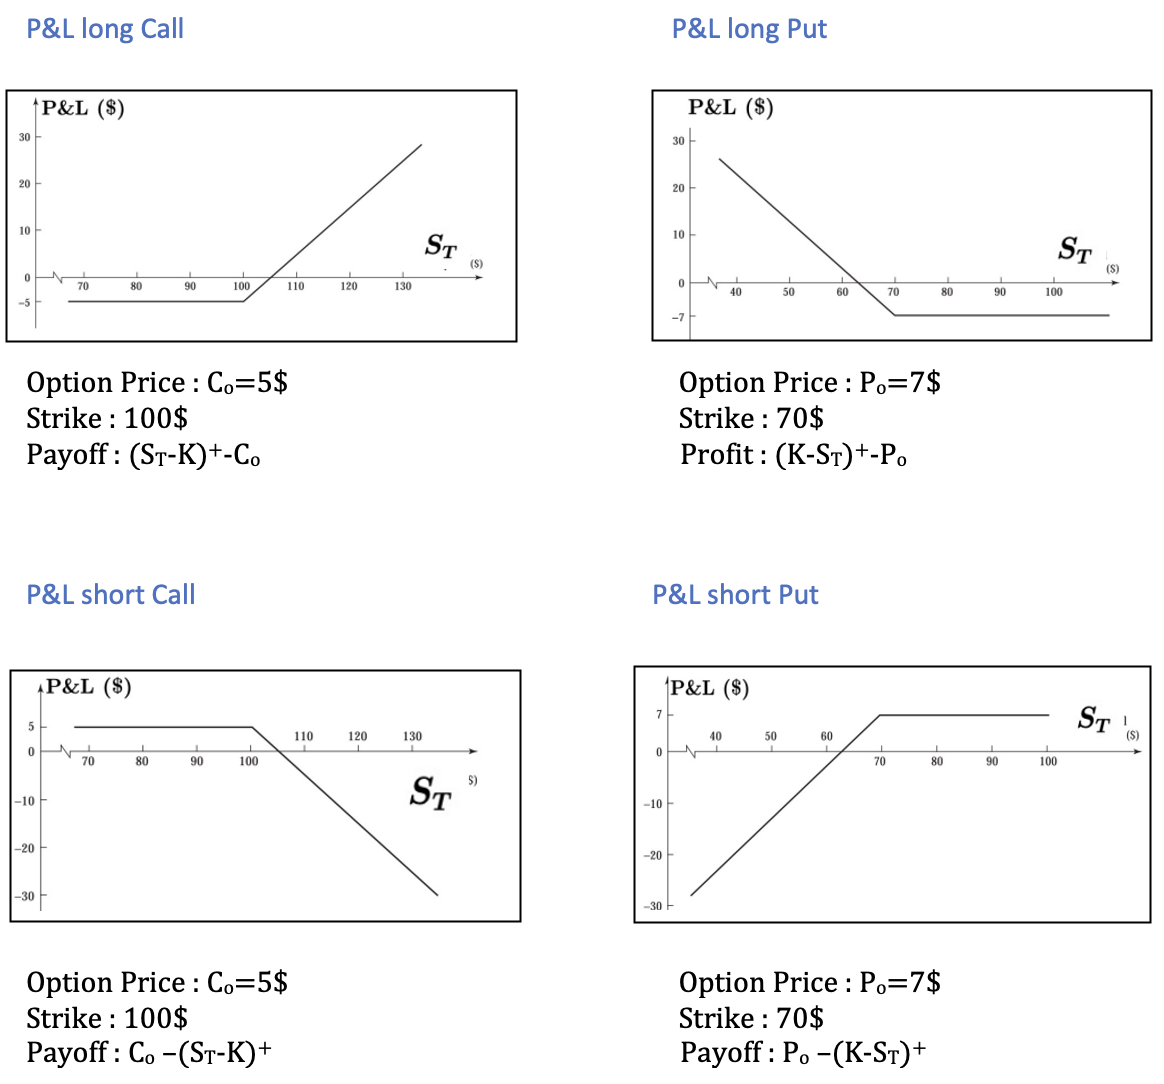

The payoff of an option is the amount of money that an option holder will receive upon exercise of the option.

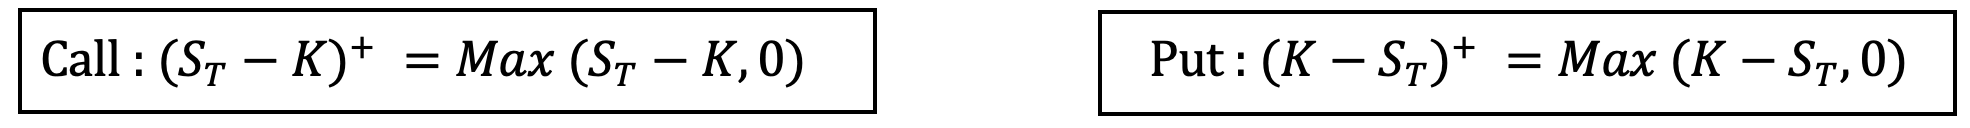

The theoretical price of an option is characterized by its payoff. It is given by the risk-neutral probability expectation of the discounted terminal payoff.

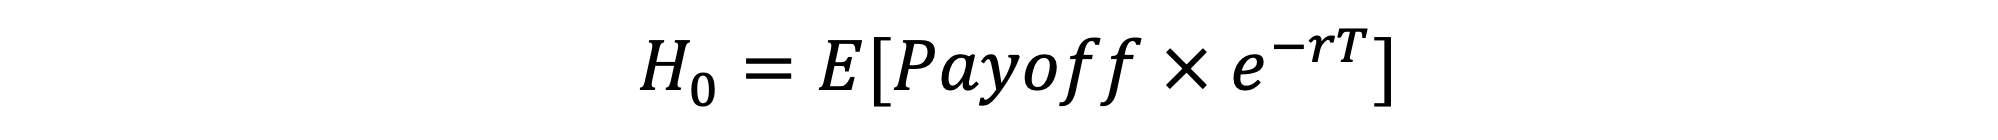

The difference between a European option and an American option is that a European option can only be exercised on the expiration date, while an American option can be exercised at any time before the expiration date.

In this section, we will focus only on the European options.

Before implementing the Monte Carlo simulation, we need to define the pricing process of the underlying asset.

**Geometric Brownian motion**  
Geometric Brownian motion is a stochastic process that can be used to generate sample paths that the underlying equity may follow. In other words, we can use geometric Brownian motion to simulate stock prices.

$$\frac{dS_t}{S_t}=\mu d_t + \sigma dW_t$$
$$S_t=S_0\exp{((\mu-\frac{1}{2}\sigma^2)t+\sigma W_t)}$$
$S_t : \text{stock price at time t}$  
$\sigma : \text{volatility term}$  
$\mu : \text{drift term}$  
$W_t: \text{Wiener process}$

The first term is a "drift" and the second term is a "shock." For each time period, our model assumes the price will "drift" up by the expected return. But the drift will be shocked (added or subtracted) by a random shock.

**Monte Carlo**  
Monte Carlo simulation is often used in the field of finance to model the future performance of financial instruments or portfolios.

In a Monte Carlo simulation, a model is created that represents the possible outcomes of a series of events. Random variables are introduced into the model, and the model is run multiple times with different random variable values each time. This allows analysts to see the range of possible outcomes and the probability of each outcome occurring.

In the context of option pricing, Monte Carlo simulations can be used to estimate the value of an option by simulating the underlying security's price movement over time. The option's value is then calculated based on the simulated path of the underlying security's price

**<u>Méthode :</u>**   

-Define the underlying asset's price process. We will use the Geometric Brownian Motion stochastic process (GBM). 

-Define the option's payoff function.  

-Simulate the underlying asset's price process at maturity.  

-Calculate the option's payoff for each simulated price.  

-Average the payoffs and discount them by the appropriate risk-free rate to get the option's price.
 

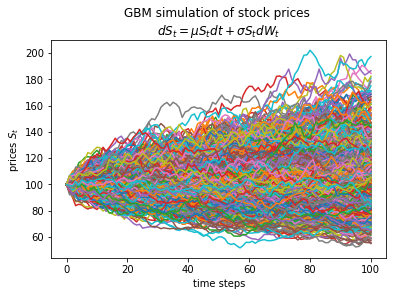

European Call Price :  10.504462407308853
European Put Price :  6.635137341338658


In [78]:
import numpy as np
import matplotlib.pyplot as plt

def GBM_simulation(S_0,mu,std,dt,nSteps,nSim):
    St=np.exp((mu-std**2 / 2)*dt+std*np.sqrt(dt)*np.random.normal(0,1,size=(nSim,nSteps)).T)
    St=np.vstack([np.ones(nSim),St]) #concatenation
    return S_0*St.cumprod(axis=0)

def payoff(St,K,optionType):
    if optionType=="call":
        payoff=[np.maximum(St[-1]-K,0)]
    elif optionType=="put":
         payoff=[np.maximum(K-St[-1],0)]
    return payoff

def optionPrice(r,T,payoff):
    return np.exp(-r*T)*np.mean(payoff)
        
#Main
#I) Geometric Brownian Motion parameters
mu = 0.01 #drift term
std = 0.1  #volatility
S_0 = 100  #last price (closing stock price)
K=101 #strike price
nSim = 1000  #number of simulations 
nSteps=100 # number of time steps
T=5  #time horizon (years) 
dt=T/nSteps

St = GBM_simulation(S_0,mu,std,dt,nSteps,nSim) #random price simulation at one day horizon (Geometric Brownian Motion)

#Plot
plt.plot(St)
plt.ylabel("prices $S_t$")
plt.xlabel('time steps')
plt.title('GBM simulation of stock prices \n$dS_t=µS_tdt+σS_tdW_t$')
plt.show()

payoffsCall=payoff(St,K,"call")
payoffsPut=payoff(St,K,"put")

CallPrice=optionPrice(mu,T,payoffsCall)
print("European Call Price : ",CallPrice)
PutPrice=optionPrice(mu,T,payoffsPut)
print("European Put Price : ",PutPrice)